In [2]:
import sys
print(f"Python interpreter path: {sys.executable}")
import numpy as np
print(f"NumPy version: {np.__version__}")
import pandas as pd
print(f"Pandas version: {pd.__version__}")
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


Python interpreter path: c:\Users\bader\anaconda3\python.exe
NumPy version: 1.26.4
Pandas version: 2.2.2


In [3]:
#.venv is my py environment, or a dedicated space for this 
# project's python packages
# this is an isolated environment, so youll need to install
# your specific modules (like a node modules)
# venv is created when you open a python file or create a ipynb file

In [4]:
# start with .venv/Scripts/activate so your commands
# point to this folder/environment
# whatever you need to install use py -m; pip can be used
# py is the windows python launcher, -m means run as script

In [5]:
# Load datasets
unemployment = pd.read_csv("UNRATE.csv")
ai_postings = pd.read_csv("AI_Job_Postings.csv")
ai_projects = pd.read_csv("Public AI projects worldwide over time.csv")
#jobdesc is way too large, reduce rows to 500

datasets = {
    "Unemployment": unemployment,
    "AI Job Postings": ai_postings,
    "AI Projects": ai_projects,
}

for name, df in datasets.items():
    print(f"\n\n{'='*50}")
    print(f"{name} Dataset Exploring")
    print(f"{'='*50}")
    
    print(f"\nShape: {df.shape}")
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nMissing values:")
    print(df.isna().sum())
    
    print(f"\nStat summary")
    print(df.describe())

    print(f"\nFirst few rows or sample data:")
    print(df.head())






Unemployment Dataset Exploring

Shape: (123, 2)

Data types:
observation_date     object
UNRATE              float64
dtype: object

Missing values:
observation_date    0
UNRATE              0
dtype: int64

Stat summary
           UNRATE
count  123.000000
mean     4.669919
std      1.713540
min      3.400000
25%      3.700000
50%      4.100000
75%      5.000000
max     14.800000

First few rows or sample data:
  observation_date  UNRATE
0       2015-01-01     5.7
1       2015-02-01     5.5
2       2015-03-01     5.4
3       2015-04-01     5.4
4       2015-05-01     5.6


AI Job Postings Dataset Exploring

Shape: (121, 3)

Data types:
Year                                        int64
AI job postings (% of all job postings)    object
Geographic area                            object
dtype: object

Missing values:
Year                                        0
AI job postings (% of all job postings)    49
Geographic area                             0
dtype: int64

Stat summary
           

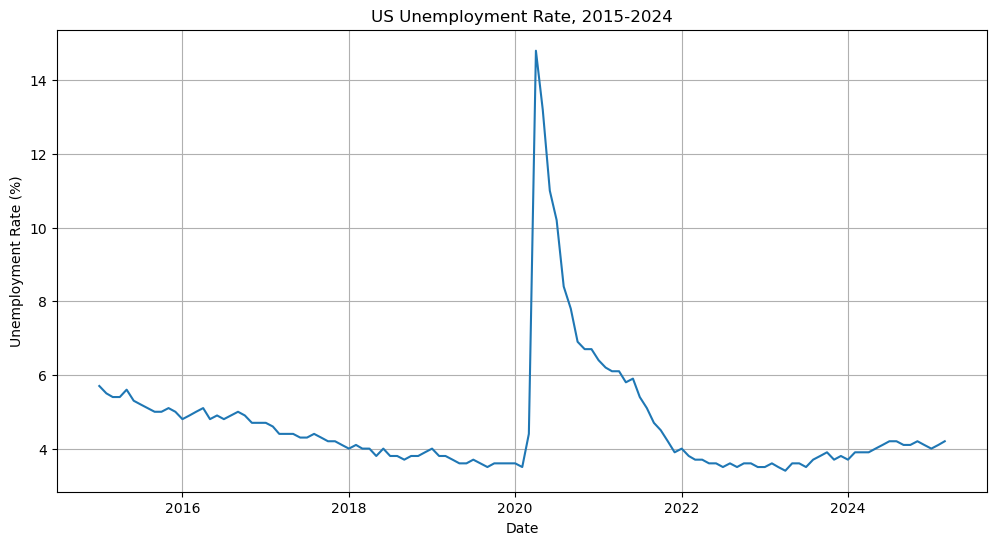

In [6]:
# Now visualize it

plt.figure(figsize=(12,6))
unemployment['observation_date'] = pd.to_datetime(unemployment['observation_date'])

plt.plot(unemployment['observation_date'], unemployment['UNRATE'])

plt.title("US Unemployment Rate, 2015-2024")

plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")

plt.grid(True)

plt.show()


C:\Users\bader\AppData\Local\Temp\ipykernel_15100\799904390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_projects['Date'] = total_projects['Date'].astype(str)
C:\Users\bader\AppData\Local\Temp\ipykernel_15100\799904390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_projects['Year'] = pd.to_datetime(total_projects['Date'], format='%Y')


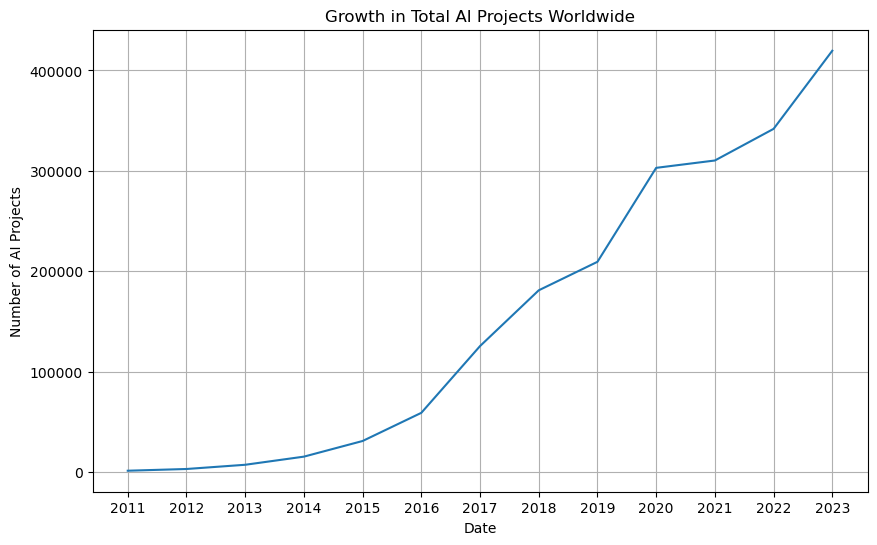

In [7]:
# filter
total_projects = ai_projects[ai_projects['Data_volume'] == 'Total AI projects']
total_projects['Date'] = total_projects['Date'].astype(str)

total_projects['Year'] = pd.to_datetime(total_projects['Date'], format='%Y')

plt.figure(figsize=(10,6))
plt.plot(total_projects['Date'], total_projects['# AI Projects'])

plt.title("Growth in Total AI Projects Worldwide")

plt.xlabel("Date")
plt.ylabel("Number of AI Projects")
plt.grid(True)

plt.show()

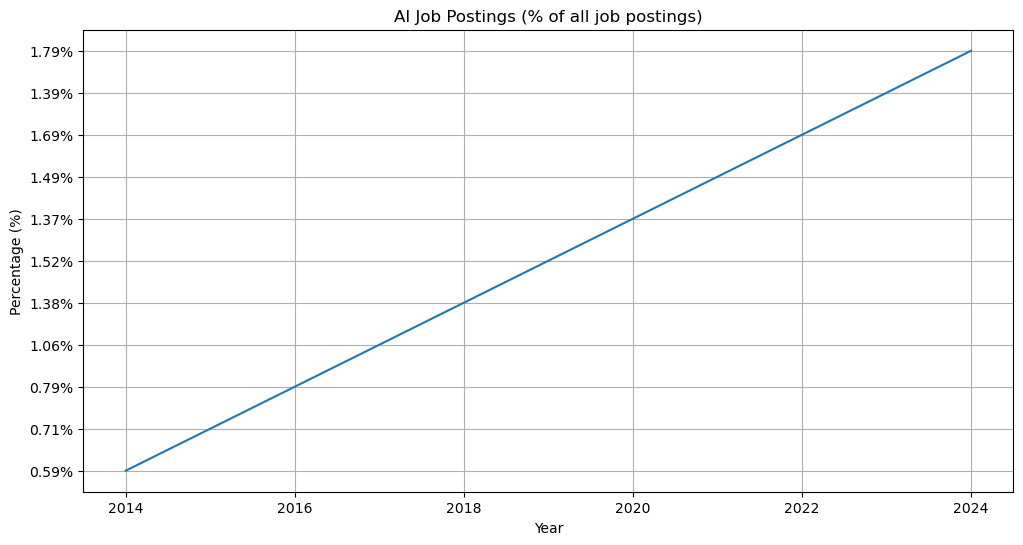

In [8]:
#AI Job Postings
us_jobs = ai_postings[ai_postings["Geographic area"] == 'United States']
plt.figure(figsize=(12,6))
plt.plot(us_jobs['Year'], us_jobs['AI job postings (% of all job postings)'])

plt.title("AI Job Postings (% of all job postings)")

plt.xlabel("Year")
plt.ylabel("Percentage (%)")

plt.grid(True)

plt.show()

In [9]:
# Handle missing values for all 3 datasets
print(ai_postings.isna().sum())


countries_with_data = ai_postings.groupby('Geographic area')['AI job postings (% of all job postings)'].count().sort_values(ascending=False)
print(countries_with_data)

ai_postings['Year'] = pd.to_datetime(ai_postings['Year'], format='%Y')

us_ai_postings = ai_postings[ai_postings['Geographic area'] == 'United States']


Year                                        0
AI job postings (% of all job postings)    49
Geographic area                             0
dtype: int64
Geographic area
Canada                  11
United Kingdom          11
United States           11
Belgium                  6
Netherlands              6
Sweden                   6
Switzerland              6
Singapore                5
United Arab Emirates     4
Hong Kong                3
Luxembourg               3
Name: AI job postings (% of all job postings), dtype: int64


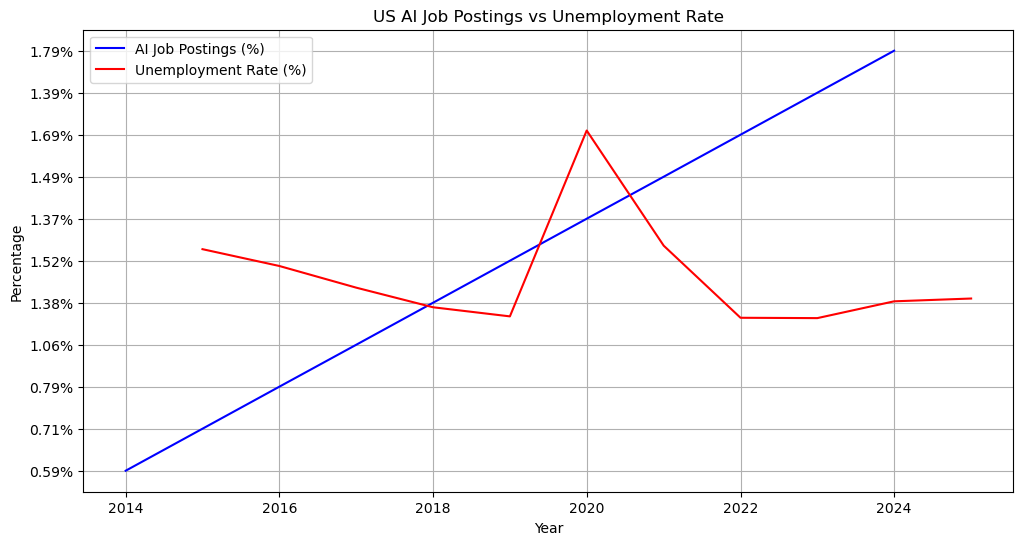

In [10]:
# Convert your unemployment data to yearly format to match with AI postings
unemployment['Year'] = pd.to_datetime(unemployment['observation_date']).dt.year
yearly_unemployment = unemployment.groupby('Year')['UNRATE'].mean().reset_index()

# Convert Year to datetime to match your ai_postings_zero format
yearly_unemployment['Year'] = pd.to_datetime(yearly_unemployment['Year'], format='%Y')

plt.figure(figsize=(12, 6))
plt.plot(us_ai_postings['Year'], us_ai_postings['AI job postings (% of all job postings)'], 'b-', label='AI Job Postings (%)')
plt.plot(yearly_unemployment['Year'], yearly_unemployment['UNRATE'], 'r-', label='Unemployment Rate (%)')
plt.title('US AI Job Postings vs Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Now merge dataset
merged_data = pd.merge(
    us_ai_postings,
    yearly_unemployment,
    on='Year',
    how='inner'
)

print(merged_data.shape)
print(merged_data.head())

print(f"Years included in analysis:")
print(merged_data['Year'].dt.year.sort_values().unique())


(10, 4)
        Year AI job postings (% of all job postings) Geographic area    UNRATE
0 2015-01-01                                   0.71%   United States  5.275000
1 2016-01-01                                   0.79%   United States  4.875000
2 2017-01-01                                   1.06%   United States  4.358333
3 2018-01-01                                   1.38%   United States  3.891667
4 2019-01-01                                   1.52%   United States  3.675000
Years included in analysis:
[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [12]:
# Merge AI projects
full_merged_data = pd.merge(
    merged_data,
    total_projects[['Year', '# AI Projects']],
    on='Year',
    how='inner'
)

print(full_merged_data.head())

        Year AI job postings (% of all job postings) Geographic area  \
0 2015-01-01                                   0.71%   United States   
1 2016-01-01                                   0.79%   United States   
2 2017-01-01                                   1.06%   United States   
3 2018-01-01                                   1.38%   United States   
4 2019-01-01                                   1.52%   United States   

     UNRATE  # AI Projects  
0  5.275000        31049.0  
1  4.875000        59093.0  
2  4.358333       125541.0  
3  3.891667       181062.0  
4  3.675000       209433.0  


In [13]:
# print(full_merged_data.isna().sum())
# print(full_merged_data.dtypes)
# print(full_merged_data['Year'].dt.year.sort_values().unique())
# print(full_merged_data.columns.tolist())

print(full_merged_data[['AI job postings (% of all job postings)', 'UNRATE', '# AI Projects']].describe())
print(full_merged_data['Year'].dt.year.sort_values().unique())
print("\nData sorted by year:")
print(full_merged_data[['Year', 'AI job postings (% of all job postings)', 'UNRATE', '# AI Projects']].head())

         UNRATE  # AI Projects
count  9.000000       9.000000
mean   4.756481  220092.549428
std    1.431981  133159.028493
min    3.633333   31049.000000
25%    3.675000  125541.000000
50%    4.358333  209433.000000
75%    5.275000  310301.000000
max    8.100000  419584.944853
[2015 2016 2017 2018 2019 2020 2021 2022 2023]

Data sorted by year:
        Year AI job postings (% of all job postings)    UNRATE  # AI Projects
0 2015-01-01                                   0.71%  5.275000        31049.0
1 2016-01-01                                   0.79%  4.875000        59093.0
2 2017-01-01                                   1.06%  4.358333       125541.0
3 2018-01-01                                   1.38%  3.891667       181062.0
4 2019-01-01                                   1.52%  3.675000       209433.0
